In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
sales = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/sales_sample.csv")
sales # last 3 rows are the same

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.728,0.679,8.106
1,2,A,1,2010-03-05,21827.90,False,8.056,0.693,8.106
2,3,B,1,2010-04-02,57258.43,True,16.817,0.718,7.808
3,4,B,2,2010-05-07,17413.94,False,22.528,0.749,7.808
4,3,B,2,2010-06-04,17558.09,False,27.050,0.715,7.808
5,6,C,2,2010-06-04,17558.09,True,27.050,0.715,7.808
6,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808
7,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808
8,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808


### Extracting the Year, Month, and Day from the Date Column
-   You can access the components of a date (year, month and day) using code of the form `dataframe["column"].dt.component`. For example, the month component is `dataframe["column"].dt.month`, and the year component is `dataframe["column"].dt.year`.

-   The `dt` accessor in pandas is used to access the datetime properties of a Series that contains datetime objects. It allows you to extract various components of the datetime, such as the year, month, day, hour, minute, second, etc.

In [38]:
# convert the column to datetime format
sales["date"] = pd.to_datetime(sales["date"]) # This ensures that pandas recognizes the column as containing datetime objects
sales["year"] = sales["date"].dt.year # extracting the year component from the 'date' column
sales

# NOTE: you can access all of the typical `datetime` methods within the namespace `.dt`

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,year
0,1,A,1,2010-02-05,24924.50,False,5.728,0.679,8.106,2010
1,2,A,1,2010-03-05,21827.90,False,8.056,0.693,8.106,2010
2,3,B,1,2010-04-02,57258.43,True,16.817,0.718,7.808,2010
3,4,B,2,2010-05-07,17413.94,False,22.528,0.749,7.808,2010
4,3,B,2,2010-06-04,17558.09,False,27.050,0.715,7.808,2010
5,6,C,2,2010-06-04,17558.09,True,27.050,0.715,7.808,2010
6,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808,2010
7,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808,2010
8,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808,2010


# Patterns over time
When data includes dates or time values, we'll want to examine whether there might be patterns over time
# DateTime Data
### Converting Columns to DateTime Data 

In [39]:
# When a CSV file is imported into pandas, date and time data are typically interpreted as strings (You can examine that by `divorce.dtypes`)
# We can fix that by passing the `parse_dates` arg and setting it equal to a list of column names that should be interpreted as DateTime data
divorce = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/divorce.csv", \
						parse_dates=["divorce_date", "marriage_date", "dob_man", "dob_woman"])
divorce # divorce filings taking place in Mexico from 2000 until 2015

# Of course, we may wish to update data types to DateTime data after we import the data. This is possible with `pd.to_datetime()`
	# e.g., divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
# `pd.to_datetime()` has lots of other useful functionalities 
# For example, if a DataFrame has month, day, and year data stored in three different columns
# we can combine these columns into a single DateTime value by passing them to `pd.to_datetime()`
	# e.g., divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])
	# Note that for this trick to work, columns must be named "month", "day", and "year", but can appear in any order in the DataFrame

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2204,2006-10-31,1969-11-27,Professional,6000.0,1975-09-01,Professional,14000.0,2002-03-08,4.0,NaN
2205,2006-10-31,1970-09-17,Professional,6000.0,1977-07-22,Professional,6000.0,2002-03-22,4.0,NaN
2206,2011-10-31,1976-03-11,Professional,8000.0,1978-12-28,Professional,7000.0,2009-02-10,2.0,NaN
2207,2012-10-31,1977-10-29,Professional,12500.0,1978-12-01,Professional,6000.0,2008-10-25,3.0,NaN


### Pandas `Timestamp` object

you can imagine the Pandas `Timestamp` object as a Python `Datetime` object with a different name. They behave basically exactly the same.

In [40]:
print(type(divorce['divorce_date'].iloc[0]))
divorce['divorce_date'].dtype

# The `dtype` for the entire column is <M8[ns] (stands for "datetime64 in nanosecond precision." = datetime64[ns]), 
# which is a NumPy data type representing datetime values with nanosecond precision. 
# This type is optimized for vectorized operations across the entire column, making it more efficient for processing large datasets.

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


dtype('<M8[ns]')

### Extracting the Year, Month, and Day from the Date Column

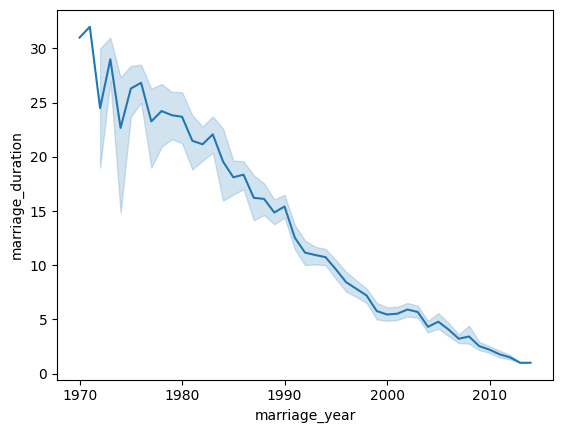

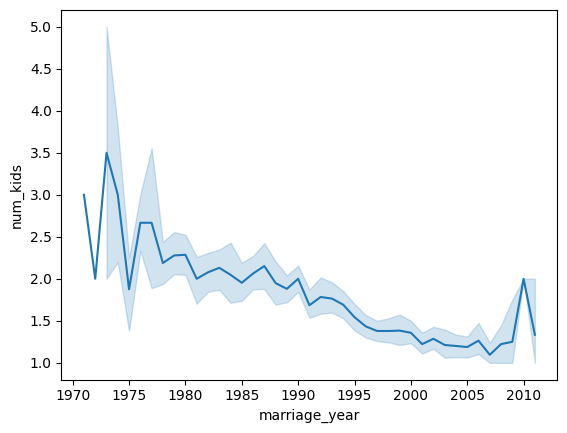

In [41]:
divorce["marriage_year"] = divorce["marriage_date"].dt.year
sns.lineplot(data=divorce, x="marriage_year", y="marriage_duration")
plt.show()

sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

## `date`, `timedelta`, `datetime` objects

In [42]:
from datetime import date, timedelta, datetime, timezone

# args → (year, month, day)
birth_date = date(2004, 6, 25)
today = date.today()

""" Note:
be careful using this technique (calculating number of days between two dates) for historical dates hundreds or thousands of years in the past. 
Our calendar systems have changed over time, and not every date from then would be the same day and month today.

Explanation → Over the centuries, different cultures and countries have used different calendar systems. 
For example, before the widespread adoption of the Gregorian calendar (which is the calendar system most of the world uses today), 
many regions used the Julian calendar. The Julian calendar, introduced by Julius Caesar in 45 BCE, 
has a different method for calculating leap years compared to the Gregorian calendar, which was introduced in 1582. 
As a result, the same date in the Julian calendar may correspond to a different date in the Gregorian calendar.
"""
age = today - birth_date # subtracting `date`s returns a 'timedelta' object that represents the elapsed time between events
age

datetime.timedelta(days=7494)

In [43]:
td = timedelta(days=age.days) # 'td' is the same as 'age'
print(birth_date + td) # prints today's date
assert today == (birth_date + td) 

2024-12-31


## Turning `date`s into strings

**Why turning into `string`?**

-	printing results

-	putting dates into filenames

-	writing dates out to CSV or Excel files

### ISO 8601 Format (YYYY-mm-dd)

**Pros:**

-	All generated dates in this format have the same length (10 chars)

-	This format is sorting-friendly as the years are compared first, followed by months, and days

→ Converting a date to the ISO representation as a string: `date.isoformat()`

### Every Other Format

If you don't want to put dates in ISO 8601 format, Python has a flexible set of options for representing dates in other ways, using the `strftime("format string")` method.

In [44]:
print(birth_date) # prints date in the ISO format (YYYY-MM-DD). This default format is also known as ISO 8601 format

# convert a date to the ISO representation as a string
birth_date.isoformat()

2004-06-25


'2004-06-25'

In [45]:
# you can use `sorted()` to sort a list of dates 
sorted(['2000-01-01', '1999-12-31'])

['1999-12-31', '2000-01-01']

In [46]:
# strftime → string format time
print(birth_date.strftime("%Y"))
print(birth_date.strftime("Year is %Y"))

# US Format: mm/dd/YYYY
print(birth_date.strftime("%m/%d/%Y"))

print(birth_date.strftime("%c"))

# → Date Formats: https://www.geeksforgeeks.org/how-to-format-date-using-strftime-in-python/

2004
Year is 2004
06/25/2004
Fri Jun 25 00:00:00 2004


### Combining Dates and Times → `datetime` objects

In [47]:
# Computers generally use 24 hour time, meaning that 3 PM is represented as hour 15 of 24
# args: year, month, day, hour, minute, second, microsecond → All of these arguments need to be integers;
# if you want to represent 0.5 seconds, you can pass 500,000 to the `microsecond` arg
dt = datetime(2017, 10, 1, 15, 23, 25, 500000) # October 1st, 2017 at 3:23:25.5 PM
print(dt) # = print(dt.strftime("%Y-%m-%d %H:%M:%S"))

# ISO format for `datetime` objects
print(dt.isoformat())

2017-10-01 15:23:25.500000
2017-10-01T15:23:25.500000


### Replacing Parts of a `datetime`

In [48]:
print(dt.replace(minute=0, second=0, microsecond=0))

2017-10-01 15:00:00


### Parsing string `datetime`s with `strptime()`

In [49]:
# strptime() → string parse time
# takes two arguments: the first one is a string to turn into a datetime, and the second one is a format string that says how to do it.
dt = datetime.strptime("12/30/2017 15:19:13",
					   "%m/%d/%Y %H:%M:%S")
print(dt) # parsing worked correctly

# Unfortunately, Python does not have the ability to parse non-zero-padded dates 
# (i.e., dates where single-digit months or days are not prefixed by a 0, such as 1/2/2018). 
# If needed, you can use other string methods to create zero-padded strings suitable for `strptime()`.

2017-12-30 15:19:13


### The Unix timestamp

Many computers store datetime information behind the scenes as **the number of seconds since January 1st, 1970**. This date is largely considered the birth of modern-style computers.

<br>

**Potential issue for computer systems that represent time as a signed 32-bit integer:** (Year 2038 problem)

The largest number that some older computers can hold in one variable is **2147483647** (INT_MAX-1 in C++), which as a Unix timestamp is in January 2038. On that day, many computers which haven't been upgraded will fail. Hopefully, none of them are running anything critical!

-	The timestamp 2,147,483,647 corresponds to January 19, 2038, at 03:14:07 UTC.

-	After this time, if the timestamp increases by one more second, it will overflow and become -2,147,483,648, which corresponds to December 13, 1901, 20:45:52 UTC (UTC stands for Coordinated Universal Time. It is the primary time standard by which the world regulates clocks and time).

-	This overflow would cause the system to interpret the date incorrectly, leading to potential failures in software that relies on accurate timekeeping.

In [50]:
# A float number represents a timestamp
ts = datetime.timestamp(datetime(2004, 6, 25))
print(ts)

# convert to `datetime` and print
print(datetime.fromtimestamp(ts))

# check: convert the timestamp to years
assert int(ts/60/60/24/365.25) == (2004 - 1970)

1088110800.0
2004-06-25 00:00:00


### Arithmetic operations with `datetime`s

Remember that `timedelta` objects are represented in Python as a number of days and seconds of elapsed time. **Be careful not to use `.seconds` attribute on a `timedelta` object** (unless you're sure), since you'll just get the number of seconds without the days! **Instead, use the `.total_seconds()` method**.

In [51]:
birth_date = datetime(2004, 6, 25)
delta1 = timedelta(days=1, seconds=5)
delta2 = timedelta(days=-1, seconds=-5) # can take -ve values

print(birth_date + delta1)

assert (birth_date - delta1) == (birth_date + delta2)

2004-06-26 00:00:05


In [52]:
print(delta1.seconds)
print(delta1.total_seconds())
delta1.total_seconds()/60/60/24

5
86405.0


1.0000578703703702

## UTC offsets

Sometimes, you really need to know exactly when something happened. Up until now, the datetime objects we have worked with are what is called "naive", and can't be compared across different parts of the world. They don't know anything about their time zone.

### Time Zones

Why does this matter? Before time zones, each town or city set its clock so that noon was directly overhead. But, this meant that these two cities had clocks that were different. 

So, how do we know how to set the clock? Because the United Kingdom was the first to standardize its time, everyone in the world sets their clocks relative to the original historical UK standard. This standard time is called **UTC**. Because all clocks are set relative to UTC, we can compare time around the world. Generally, **clocks west of the UK are set earlier than UTC** (UTC - x), and **clocks east of the UK are set later than UTC** (UTC + x). For example, the eastern United States is typically "UTC - 5 hours", while India is typically "UTC + 5 hours 30 minutes".

The `timezone` class from the `datetime` package lets you specify what timezone the clock was in when our data was recorded.

---

معلومات إسرائيلية:

Did you know that there is no official time zone at the North or South pole? Since all the lines of longitude meet each other, it's up to each traveler (or research station) to decide what time they want to use.

In [53]:
# create a timezone object, which accepts a timedelta that explains how to translate your datetime into "UTC"
# US Eastern Standard time zone
ET = timezone(timedelta(hours=-5))

# Timezone-aware datetime
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo=ET)
print(dt)
dt

2017-12-30 15:09:03-05:00


datetime.datetime(2017, 12, 30, 15, 9, 3, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400)))

### Adjusting Timezone (same moment, different clock)

In [54]:
# suppose you want to know what the date and time would have been if the clock had been set to India Standard Time instead.

# India Standard time zone
IST = timezone(timedelta(hours=5, minutes=30))

# create a new datetime object corresponding to the same moment in ET, but adjusted to a different time zone IST.
print(dt.astimezone(IST)) 

2017-12-31 01:39:03+05:30


### Changing `tzinfo` (different moment, same clock)

In [55]:
print(dt.replace(tzinfo=timezone.utc))

2017-12-30 15:09:03+00:00


## Time Zone Database

How could we know the timezone for each area in the world?

Thankfully, there is a database called `tz`, updated 3-4 times a year as timezone rules change. This database is used by computer programs across many programming languages. Because timezone information changes so quickly, it doesn't make sense to bundle it directly into Python. Instead, we will use a package called `dateutil` (stands for **Date Util**ity).

Within `tz`, time zones are defined first by the **continent** they are on, and then by the **nearest major city**.

**tz database:**

-	Format: 'Continent/City' 

	-	'America/New York'
	
	-	'America/Mexico_City'
	
	-	'Europe/London'
	
	-	'Africa/Accra'

In [56]:
from dateutil import tz

# create a `timezone` object corresponds to Eastern US Standard time zone
ET = tz.gettz('America/New_York')
ET

tzfile('US/Eastern')

In [57]:
# Instead of specifying the UTC offset yourself, you pass the timezone you got from `tz`
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo=ET)
print(dt)

2017-12-30 15:09:03-05:00


In [58]:
# Even more excitingly, this same object will adjust the UTC offset depending on the date and time. 
dt = datetime(2017, 10, 1, 15, 23, 25, tzinfo=ET)
print(dt) # different UTC offset! (due to daylight savings time (summer time) → in some places the clocks change twice a year)

# `tz` includes rules for UTC offsets going all the way back to the late 1960s, and sometimes earlier.

2017-10-01 15:23:25-04:00


## Daylight Saving Time (DST)

### Starting daylight saving time (springing forward)

![image-3.png](attachment:image-3.png)

<br>

---

<br>

### Ending daylight saving time (falling back)

![image-2.png](attachment:image-2.png)

<br>

**Note:** The times between 1:00 AM and 1:59:59 AM happen **twice** this day because of the ending of DST. We call such times as **ambiguous times** in python; we can explore whether a time is ambiguous through the `tz.datetime_ambiguous(datetime_object)` method.

In [59]:
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
print(spring_ahead_159am)

spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
print(spring_ahead_3am)

(spring_ahead_3am - spring_ahead_159am).total_seconds() # As expected, they're an hour and one second apart 
														# (But, this is false; only one second has elapsed)

2017-03-12 01:59:59
2017-03-12 03:00:00


3601.0

In [60]:
EST = timezone(timedelta(hours=-5)) # Eastern US Standard Time
EDT = timezone(timedelta(hours=-4)) # Eastern US Daylight Time

spring_ahead_159am = spring_ahead_159am.replace(tzinfo=EST)
print(spring_ahead_159am)

spring_ahead_3am = spring_ahead_3am.replace(tzinfo=EDT)
print(spring_ahead_3am)

(spring_ahead_3am - spring_ahead_159am).total_seconds() # correctly, outputs that one second has elapsed

# Putting things in terms of UTC once again allowed us to make proper comparisons.

2017-03-12 01:59:59-05:00
2017-03-12 03:00:00-04:00


1.0

In [61]:
# Just like before when `dateutil` saved us from having to define timezones by hand, it saves us from having to know daylight savings.
eastern = tz.gettz('America/New_York')

spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59, tzinfo=eastern)
print(spring_ahead_159am)

spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0, tzinfo=eastern)
print(spring_ahead_3am)

print((spring_ahead_3am - spring_ahead_159am).total_seconds()) 
# outputs "3601.0", not "1.0" because when we compare times in local time zones, 
	# everything gets converted into clock time (w/o regarding the differences in the UTC offsets)
# Remember if you want to get absolute time differences, always move to UTC! ↓↓

(spring_ahead_3am.astimezone(timezone.utc) - spring_ahead_159am.astimezone(timezone.utc)).total_seconds() 

# NOTE: In general, whenever we really want to be sure of the duration between events that might cross a daylight saving boundary, 
# NOTE: we need to do our math in UTC.

2017-03-12 01:59:59-05:00
2017-03-12 03:00:00-04:00
3601.0


1.0

In [62]:
first_1am = datetime(2023, 11, 5, 1, 0, 0, tzinfo=eastern)

# Check if the datetime is ambiguous (could happen twice in its day)
print(tz.datetime_ambiguous(first_1am))  # Outputs: True 
# Explanation:
# October 5th is the end of the summer time in eastern US. They return back to the standard time at 2:00 AM. 
# In this day, after the clock is at 1:59:59 AM, it returns back to be at 1:00 AM again. 
# So, all times between 1:00 AM and 1:59:59 AM happen twice this day because the end of DST. We call such times as ambiguous times in python.

True


In [63]:
# But, how can python know whether it's the 1st time or 2nd time that this ambiguous time occur?
# We can use the tz.enfold(datetime_object) method with the second time this ambiguous time happens to solve this issue 
# OR: we can set the `fold` argument to `1` in the `datetime` constructor
second_1am = datetime(2023, 11, 5, 1, 0, 0, tzinfo=eastern)
second_1am = tz.enfold(second_1am)
second_1am

datetime.datetime(2023, 11, 5, 1, 0, fold=1, tzinfo=tzfile('US/Eastern'))

In [64]:
print(first_1am)
print(second_1am) # Without using `tz.enfold()`, this would outputs "2023-11-05 01:00:00-04:00" (however, it should be with -5 UTC offset)

# However, Python doesn't take it into account when doing datetime arithmetic. Fold is just a placeholder! ↓↓
print((second_1am - first_1am).total_seconds()) # outputs "0.0" while they are an hour apart! 

# What are we going to do?! We need to convert to UTC, which is unambiguous. 
# When we really want to make sure that everything is accounted for, putting everything into UTC is the way to do it. ↓↓
print((second_1am.astimezone(tz.UTC) - first_1am.astimezone(tz.UTC)).total_seconds())

# NOTE: In general, whenever we really want to be sure of the duration between events that might cross a daylight saving boundary, 
# NOTE: we need to do our math in UTC.

2023-11-05 01:00:00-04:00
2023-11-05 01:00:00-05:00
0.0
3600.0


## Dates and Times in Pandas

### Summarizing (Grouping by time)

The `df.resample(unitTime, datetimeColumnToGroupOn)` function in Pandas is used to resample time-series data (group data by time). 

This is particularly useful when working with time-series data where you want to change the frequency of the data, such as converting hourly data to daily data, or summing monthly data into yearly data.

### How `df.resample()` Works

1. **Frequency Conversion**: It takes a unit time to specify a new time frequency using a string alias like **'H'**: Hourly, **'D'**: Daily, **'W'**: Weekly, **'M'**: Monthly, **'Q'**: Quarterly, and **'A'**: Annually.

2. **`on` argument:** Takes a string for the column you want to group on.

3. **Aggregation Functions**: After resampling, we can apply various aggregation functions like `sum()`, `mean()`, `count()`, etc., to the resampled data.

In [65]:
rides = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/capital-onebike.csv",\
					parse_dates=['Start date', 'End date'])
rides['Duration'] = rides['End date'] - rides['Start date']
rides['Duration seconds'] = rides['Duration'].dt.total_seconds() # use `.dt` while dealing with Pandas to access `datetime` functions
rides.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration,Duration seconds
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,0 days 00:03:01,181.0
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,0 days 02:07:02,7622.0
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,0 days 00:05:43,343.0
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,0 days 00:21:18,1278.0
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,0 days 00:21:17,1277.0


C:\Users\moham\AppData\Local\Temp\ipykernel_14964\286820900.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(rides.resample('M', on='Start date')['Duration seconds'].mean())


Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: ME, Name: Duration seconds, dtype: float64


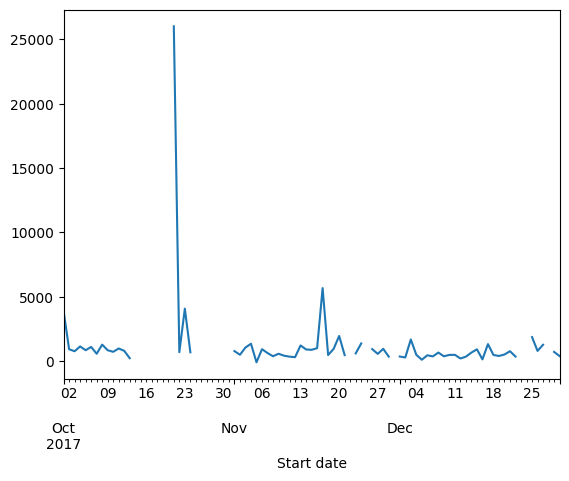

In [66]:
print(rides.resample('M', on='Start date')['Duration seconds'].mean())
rides.resample('D', on='Start date')['Duration seconds'].mean().plot() # plots a line plot by default 
plt.show()
# Plot Observations and Interpretation:
# we can see that there is at least one big outlier skewing our data: some ride in the middle of October was 25000 seconds long, 
# or nearly 7 hours. It may a bike repair. We can see that it happened after many days with zero rides, which lends strength to that idea. 
# If the bike was broken and sitting in the dock for awhile, eventually it would have been removed for repairs, then returned.

In [67]:
# `.resample()` can be called after `.groupby()`. For example, how long was the median ride by month, and by Membership type?
rides.groupby('Member type').resample('M', on='Start date')['Duration'].median()

# Output Interpretation:
# It looks like casual riders consistently took longer rides, but that both groups took shorter rides as the months went by. 

# NOTE: by combining grouping and resampling, we can answer a lot of questions about nearly any dataset that includes time as a feature. 
# Keep in mind that you can also group by more than one column at once.

C:\Users\moham\AppData\Local\Temp\ipykernel_14964\4113684457.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rides.groupby('Member type').resample('M', on='Start date')['Duration'].median()


Member type  Start date
Casual       2017-10-31          0 days 00:27:16
             2017-11-30   0 days 00:19:19.500000
             2017-12-31          0 days 00:14:10
Member       2017-10-31          0 days 00:11:11
             2017-11-30          0 days 00:10:55
             2017-12-31   0 days 00:06:27.500000
Name: Duration, dtype: timedelta64[ns]

### Timezones in Pandas

In [68]:
rides['Duration seconds'].min() # Yikes! Something is wrong, since our ride durations shouldn't ever be negative.
# datetime objects in this dataset are timezone-naive. They're not tied to any absolute time with a UTC offset.

-3346.0

In [69]:
import tzdata
# Timezone-aware operations like `tz_localize` and `tz_convert` rely on timezone databases, 
# so installing tzdata ensures that Pandas can access the necessary information.

In [70]:
print(rides['Start date'].head(3), '\n') # timezone-naive dates

# To put them into a timezone, we can use `.dt.tz_localize()`. 
print(rides['Start date'].head(3).dt.tz_localize('Europe/London'), '\n')

# NOTE: `tz_localize` is used to set a timezone, in the first place, to non-tz-aware datetimes (similar to `datetime.replace(tzinfo=)`), 
# but `tz_convert` is used with tz-aware datetimes to convert them to another timezone, (similar to `datetime.astimezone(timezone | tzfile)`)
print(rides['Start date'].head(3).dt.tz_localize('Europe/London').dt.tz_convert('America/New_York'), '\n')

0   2017-10-01 15:23:25
1   2017-10-01 15:42:57
2   2017-10-02 06:37:10
Name: Start date, dtype: datetime64[ns] 

0   2017-10-01 15:23:25+01:00
1   2017-10-01 15:42:57+01:00
2   2017-10-02 06:37:10+01:00
Name: Start date, dtype: datetime64[ns, Europe/London] 

0   2017-10-01 10:23:25-04:00
1   2017-10-01 10:42:57-04:00
2   2017-10-02 01:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York] 



In [71]:
# However, if we try to convert our entire Start date column to the America/New_York timezone, Pandas will throw an AmbiguousTimeError. 
# As expected, we have one datetime (ambiguous time) that occurs during the Daylight Saving shift.
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York')

AmbiguousTimeError: Cannot infer dst time from 2017-11-05 01:56:50, try using the 'ambiguous' argument

In [40]:
# Following the advice of the error message in the previous cell, we can set the `ambiguous` argument in `dt.tz_localize()` to 'NaT'
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

# recalculate `Duration`, ignoring bad rows
rides['Duration'] = rides['End date'] - rides['Start date']
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()
rides['Duration seconds'].min() # much more sensible output!

116.0

### Other datetime operations in Pandas

In [44]:
print(rides['Start date'].head(3).dt.day_name())
# You can also set other languages rather than English
rides['Start date'].head(3).dt.day_name('Italian')

0    Sunday
1    Sunday
2    Monday
Name: Start date, dtype: object


0    Domenica
1    Domenica
2      Lunedì
Name: Start date, dtype: object

In [42]:
# Shifting the indexes forward one

# We can also shift rows up or down with `.shift()`. 
# Here we've shifted the rides one row forward so that our zeroth row is now 'NaT', 
# and our first row has the same value that our zeroth row had before. 
print(rides['End date'].head(3).shift(1), '\n') # +1 for shifting forward; -1 for shifting backward

# This shifting is useful if you want to, for example, compare the end time of one ride with the start time of the next ride.
# We can calculate the time difference between the end of one ride and the start of the next. 
# This helps in answering questions like: How much time usually passes between rides?
rides['Gap'] = rides['Start date'] - rides['End date'].shift(1)
print("Median time passes between rides:", rides['Gap'].median().total_seconds()/60, 'min')

0                         NaT
1   2017-10-01 15:26:26-04:00
2   2017-10-01 17:49:59-04:00
Name: End date, dtype: datetime64[ns, America/New_York] 

Median time passes between rides: 67.1 min
